In [25]:
#I want to test different variations of test size and number of trees to see what scores i get.
#This was before I realized that I didn't need to scale my data before performing PCA.  The rings
#column was excluded from the PCA.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

#Create dataframe, convert categorical data to boolean, create X and y
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

df = pd.get_dummies(df, columns = ['sex'])

y = df['rings']
X = df.drop('rings', axis=1)

In [27]:
#My random forest function

def forest(X, y, tsize, numtrees, text=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0)
    
    model = RandomForestClassifier(n_estimators=numtrees, oob_score=False).fit(X_train,y_train)
    score = model.score(X_test,y_test)

    if text == True:
        print('With testing size ' + str(tsize) + ' and forest size of ' + str(numtrees) +' score = '+ str(score))

    return score

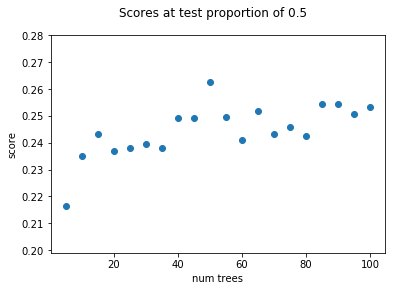

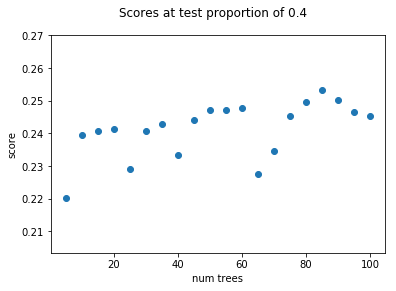

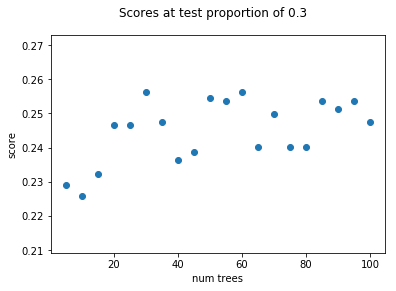

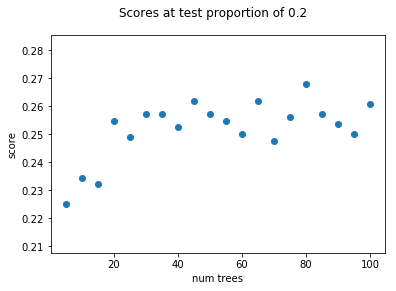

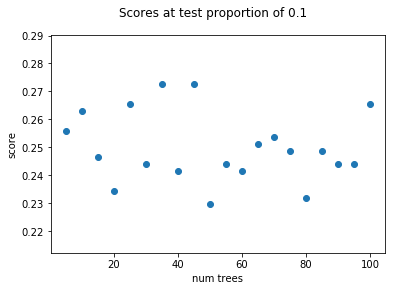

In [28]:
#explore possible variations

#for the loop
temp_scores = []

trees = list(range(5,105,5))
test_sizes = [.5,.4,.3,.2,.1]

#for each proportion of testing size, test a set of forest sizes, plot it
for test_size in test_sizes:
    for tree_num in trees:
        score = forest(X, y, test_size, tree_num, text = False)
        temp_scores.append(score)
    title = 'Scores at test proportion of ' + str(test_size)
    plt.scatter(x=trees, y=temp_scores)
    plt.suptitle(title)
    plt.xlabel('num trees')
    plt.ylabel('score')
    plt.show()
    temp_scores = []

In [29]:
#Again, but put it all in a dataframe

all_scores = []

trees = list(range(5,105,5))
test_sizes = [.5,.4,.3,.2,.1]

for test_size in test_sizes:
    for tree_num in trees:
        score = forest(X, y, test_size, tree_num, text = False)
        all_scores.append([test_size, tree_num, score])

all_scoresDF = pd.DataFrame(all_scores, columns = ['testing size','num trees', 'score'])

In [30]:
all_scoresDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
testing size    100 non-null float64
num trees       100 non-null int64
score           100 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [31]:
sortedDF = all_scoresDF.sort_values(['score'], ascending = False)
sortedDF.head(8)

,testing size,num trees,score
65,0.2,30,0.279904
68,0.2,45,0.279904
99,0.1,100,0.275120
67,0.2,40,0.269139
76,0.2,85,0.269139
75,0.2,80,0.264354
92,0.1,65,0.263158
78,0.2,95,0.263158


In [32]:
#forest(X, y, tsize, numtrees, text=True)

forest(X,y,0.2,85)

With testing size 0.2 and forest size of 85 score = 0.252392344498


0.25239234449760767

The values are inconsistent.  Probably because I'm getting new "testing" and "training" sets each time, and some work better than others.  Great.

In [46]:
#is there a test proportion with consistently better scores?

tprop = all_scoresDF['testing size'].unique()

for size in tprop:
    boo = all_scoresDF['testing size'] == size
    temp = all_scoresDF[boo]
    mean = temp['score'].mean()
    print('Testing proportion of ' + str(size) + ' had a mean score of ' + str(mean))
    print('\n')

Testing proportion of 0.5 had a mean score of 0.24442049808429123


Testing proportion of 0.4 had a mean score of 0.24254937163375226


Testing proportion of 0.3 had a mean score of 0.24213886671987228


Testing proportion of 0.2 had a mean score of 0.25394736842105264


Testing proportion of 0.1 had a mean score of 0.24796650717703347




Doesn't appear all that significant.  But I'll stick with a test size of 0.2 and 25 trees for now.